In [1]:
import datetime as dt
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
start = dt.datetime.today()- dt.timedelta(360)
end = dt.datetime.today()

bist_data = yf.download("XU100.IS", start = start, end = end) # Borsa İstanbul
sp_data = yf.download("^GSPC", start = start , end = end )

/var/folders/49/q5q_jjls7tq8knq4wvstm17m0000gn/T/ipykernel_44631/3038014378.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bist_data = yf.download("XU100.IS", start = start, end = end)
[*********************100%***********************]  1 of 1 completed
/var/folders/49/q5q_jjls7tq8knq4wvstm17m0000gn/T/ipykernel_44631/3038014378.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp_data = yf.download("^GSPC", start = start , end = end )
[*********************100%***********************]  1 of 1 completed


In [8]:
#closing prices
bist_cl_price = bist_data["Close"]
sp_cl_price = sp_data["Close"]
print(bist_cl_price.head())
print(sp_cl_price.head())

Ticker         XU100.IS
Date                   
2024-11-04  8663.854492
2024-11-05  8618.553711
2024-11-06  8862.252930
2024-11-07  8946.051758
2024-11-08  9184.750977
Ticker            ^GSPC
Date                   
2024-11-04  5712.689941
2024-11-05  5782.759766
2024-11-06  5929.040039
2024-11-07  5973.100098
2024-11-08  5995.540039


In [38]:
# get daily return of each sticker
bist_return_daily = bist_data["Close"].pct_change().dropna()
sp_return_daily = sp_data["Close"].pct_change().dropna()

# Combine
combined_data = pd.concat([bist_ret, sp_ret], axis=1)
combined_data.columns = ["BIST", "SP500"]
combined_data = combined_data.dropna()

# calculate Correlation
corr = combined_data["BIST"].corr(combined_data["SP500"])
print("Correlation:", corr)



Correlation: 0.08987205980227053


In [31]:
# 30 day of rolling correlation
rolling_corr = combined_data["BIST"].rolling(window=30).corr(combined_data["SP500"])

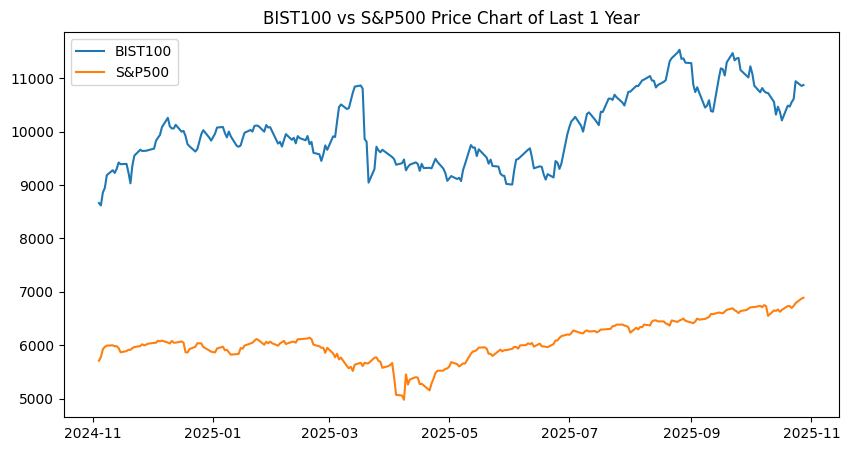

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(bist_cl_price, label="BIST100")
plt.plot(sp_cl_price, label="S&P500")
plt.title("BIST100 vs S&P500 Price Chart of Last 1 Year")
plt.legend()
plt.show()


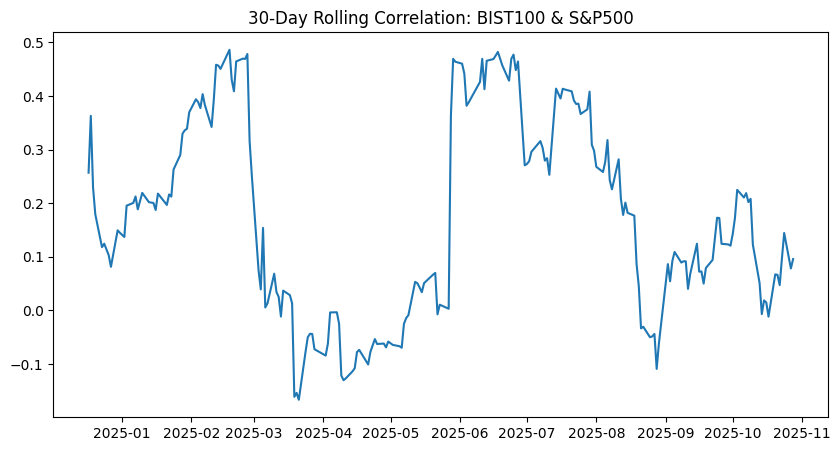

In [56]:
plt.figure(figsize=(10,5))
plt.plot(rolling_corr)
plt.title("30-Day Rolling Correlation: BIST100 & S&P500")
plt.show()

Mean of 30 day rolling correlation: 0.1728992602100858


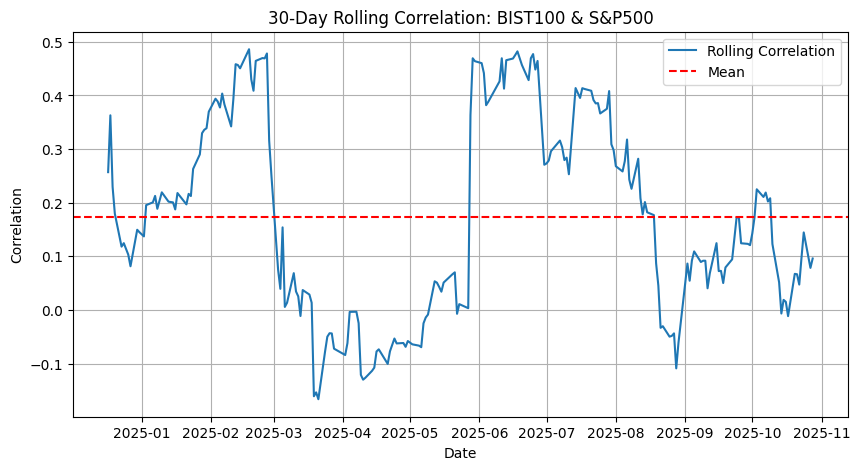

In [59]:
# Ortalama değeri hesapla
rolling_corr_mean = rolling_corr.mean()
print("Mean of 30 day rolling correlation:", rolling_corr_mean)

# Grafik
plt.figure(figsize=(10,5))
plt.plot(rolling_corr, label="Rolling Correlation")
plt.axhline(rolling_corr_mean, color='red', linestyle='--', label="Mean")  
plt.title("30-Day Rolling Correlation: BIST100 & S&P500")
plt.ylabel("Correlation")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()